# Assignment 1

## Question `2` (Decision Trees)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

This assignment will have you working and experimenting with decision trees. Initially, you will be required to implement a decision tree classifier by choosing thresholds based on various impurity measures and reporting the scores. Later, you can experiment with the `scikit-learn` implementation of decision trees, and how various other parameters can be leveraged for better performance.

The dataset is a very simple one, the [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It has 5 columns, the first 4 are the features, and the last one is the class label. The features are the variance, skewness, curtosis and entropy of the [wavelet transformed](https://en.wikipedia.org/wiki/Wavelet_transform) image of the banknote. The class label is 1 if the banknote is authentic, and 0 if it is forged. The data is present in `bankAuth.txt`. There are a total of 1372 samples in the dataset.

### Imports

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# additional imports if necessary

### Impurity Measures

Decision trees are only as good as the impurity measure used to choose the best split. In this section, you will be required to implement the following impurity measures and use them to build a decision tree classifier.

1. Gini Index
2. Entropy
3. Misclassification Error
4. Log Loss

Write functions that calculate the impurity measures for a given set of labels. The functions should take in a list of labels and return the impurity measure.

In [121]:
# your code here
# your code here
def entropy_impurity( y):
        yunique=np.unique(y);
        entrophy=0
        i=0
        n=len(yunique)
        l=[]
        while i <n:
          l.append(len(y[y == yunique[i]]) / len(y))
          i=i+1
        for i in l:
          entrophy=entrophy-i*np.log2(i)
        return entrophy

    
def gini_impurity( y):
    yunique=np.unique(y);
    gini=1
    i=0
    n=len(yunique)
    l=[]
    while i <n:
      l.append((len(y[y == yunique[i]]) / len(y))*(len(y[y == yunique[i]]) / len(y)))
      i=i+1
    for i in l:
      gini=gini-i
    return gini
def Misclassification_Error( y):
  yunique=np.unique(y);
  
  i=0
  n=len(yunique)
  l=[]
  while i <n:
    l.append(len(y[y == yunique[i]]) / len(y))
    i=i+1
  mis=0
  for i in l:
    mis=max(mis,i)
  return 1-mis

### Decision Tree

Fit a decision tree using any one of the above impurity measures with a depth of 3. This means you will have eight leaf nodes and seven internal nodes. Report the threshold values at each internal node and the impurity measure at the final leaf node with the label. Also report the accuracy of the classifier on the training and test data (instructions for splitting the data will be given in the end).

In [122]:
# your code here
# your code here
class node():
    def __init__(self, decisionlogic=None, maxenergy=None, left=None, right=None, gaininginfo=None, data=None):
        
        # for decision node
        self.decisionlogic =decisionlogic
        self.maxenergy= maxenergy
        self.left = left
        self.right = right
        self.gaininginfo = gaininginfo
        
        # for leaf node
        self.data = data
from inspect import indentsize
class customDecisionTreeClassifier():
    def __init__(self, minsampleSplit=2,depth=2,mode=None):
        
        self.root = None
        self.mode=mode
        self.minsampleSplit = minsampleSplit
        self.depth = depth-1
        
    
        
        
    def buildTree(self, dataset, cur=0,mode="entropy"):
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        samples, features = np.shape(X)
        z=Y.tolist()
        if samples<self.minsampleSplit :
          return node(data=max(set(z), key = z.count))
        if cur>self.depth:
          return node(data=max(set(z), key = z.count))

      
        split = self.potentialsplit(dataset, samples, features,mode)
        if split["info"]<=0:
          return node(data=max(set(z), key = z.count))
        lefttree = self.buildTree(split["datasetLeft"], cur+1)
        righttree = self.buildTree(split["datasetRight"], cur+1)
        return node(split["index"], split["maxenergy"], 
                    lefttree, righttree, split["info"])

       

    def potentialsplit(self, dataset, num_samples, num_features,mode):
        
        actual_split = {}
        actual_split["info"] = 0
        actual_split["index"] = -1
        actual_split["maxenergy"] = -1
        actual_split["datasetLeft"] = dataset
        actual_split["datasetRight"] = dataset
        max_info_gain = -float("inf")
        ind=0
        while ind<num_features:

            
            feature_values = dataset[:, ind]
            possible_thresholds = np.unique(feature_values)

            np.sort(possible_thresholds)
            i=0
            while i <(len(possible_thresholds)-1):
                threshold=possible_thresholds[i]+possible_thresholds[i+1]//2
                dataset_left = dataset[dataset[:, ind] <= threshold]  
                dataset_right = dataset[dataset[:, ind] >threshold] 
                len1=len(dataset_left) 
                len2=len(dataset_right)
                curr_info_gain=-float("inf")
                if len1>0 and len2>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.informationfun(y, left_y, right_y, mode)
                if curr_info_gain>max_info_gain:
                    
                    actual_split["info"] = curr_info_gain
                    actual_split["index"] = ind
                    actual_split["maxenergy"] = threshold
                    actual_split["datasetLeft"] = dataset_left
                    actual_split["datasetRight"] = dataset_right
                    max_info_gain = curr_info_gain
                i=i+1
            ind=ind+1
                        
        return actual_split
    

    
    def informationfun(self, par, left, right, mode="entropy"):
        
        if mode=="entropy":
          left_entropy=entropy_impurity(left)*len(left) / len(par)
          right_entropy=entropy_impurity(right)*len(right) / len(par)
          return entropy_impurity(par)-left_entropy-right_entropy
        elif mode=="gini":
          left_gini=gini_impurity(left)*len(left) / len(par)
          right_gini=gini_impurity(right)*len(right) / len(par)
          return gini_impurity(par)-left_gini-right_gini
        elif mode=="misc":
          mis1=Misclassification_Error(left)*len(left) / len(par)
          mis2=Misclassification_Error(right)*len(right) / len(par)
          return Misclassification_Error(par)-max(mis1,mis2)
          

    def fit(self, X, Y,mode):
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.buildTree(dataset,0,mode)
    
    def predict(self, X):
        p=[]
        for i in X:
          r=self.root

          while(r.data==None):
            fv=i[r.decisionlogic]
            if fv<=r.maxenergy:
              r=r.left
            else :
              r=r.right
          p.append(r.data)
        return p
        
    def preorder(self, rx,n):
      if rx.data !=None:
        
        print("level =",n," label =",rx.data)
      if rx.data==None:
        print("selected features no:",rx.decisionlogic,"and corresponding threshould:",rx.maxenergy)

        l=rx.left
        self.preorder(l,n+1)
        r=rx.right
        self.preorder(r,n+1)
    def traverse(self):
      r=self.root
      self.preorder(r,0)
      

### `sklearn` Decision Tree Experiments

1. Scikit-learn has two decision tree implementations: [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). 

When would you use one over the other? What would you use in the case of the banknote authentication dataset? Explain the changes that need to be made in the dataset to use the other implementation.

2. Fit a decision tree to the training set. Change various parameters and compare them to one another. Mainly try and experiment with the `criterion`, `max_depth` and `min_samples_split` parameters. Report the accuracy on the training and test set for each of the experiments while varying the parameters for comparison purposes.

3. Plot your trees !! (optional) (for visualization)

```python
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
```

ans1: decision tree classifier mainly used for classification type problem,whereas decision tree regressor is used for regresion tyoe problem

ans 2: this is classification based problem , thats why i am using decision tree classifier.

ans 3: suppose in question if someone asked the probability that bank notes is authentic. then we will use decision tree regressor

In [123]:
# your code here
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
from sklearn.tree import DecisionTreeClassifier
def inbuildecisiontreeondepth(X_train,Y_train , X_test,Y_test):
  val=0
  ind=0
  for i in range(6):
    decision_tree = DecisionTreeClassifier(random_state=1, max_depth=2+i,min_samples_split = 5,criterion="gini")
    decision_tree = decision_tree.fit(X_train, Y_train)
    Ytest_pred=decision_tree.predict(X_test)
    Ytrain_pred=decision_tree.predict(X_train)
    acc=accuracy_score(Y_test, Ytest_pred)*100
    if val<acc:
      val=acc
      ind = i
    print("training accuracy on depth ",i+2," =",accuracy_score(Y_train, Ytrain_pred)*100)
    print("test accuracy on depth",i+2," =",acc)
  decision_tree = DecisionTreeClassifier(random_state=1, max_depth=2+ind,min_samples_split = 5,criterion="gini")
  decision_tree = decision_tree.fit(X_train, Y_train)
  Ytest_pred=decision_tree.predict(X_test)
  plotTree(decision_tree)
def inbuildecisiontreeonminsamlesplit(X_train,Y_train,X_test,Y_test):
  val=0
  ind=0
  for i in range(6):
    decision_tree = DecisionTreeClassifier(random_state=1, max_depth=3,min_samples_split = 2+i , criterion="gini")
    decision_tree = decision_tree.fit(X_train, Y_train)
    Ytest_pred=decision_tree.predict(X_test)
    
    Ytrain_pred=decision_tree.predict(X_train)
    acc=accuracy_score(Y_test, Ytest_pred)*100
    if val<acc:
      val=acc
      ind = i
    print("training accuracy on minsamplesplit ",i+2," =",accuracy_score(Y_train, Ytrain_pred)*100)
    print("test accuracy on minsamplesplit",i+2," =",acc)
  decision_tree = DecisionTreeClassifier(random_state=1, max_depth=3,min_samples_split = 2+ind , criterion="gini")
  decision_tree = decision_tree.fit(X_train, Y_train)
  Ytest_pred=decision_tree.predict(X_test)
  plotTree(decision_tree)
def inbuildecisiontreeonmincritenion(X_train,Y_train,X_test,Y_test):
  l=["entropy","gini"]
  val=0
  ind="gini"
  for i in l:
    decision_tree = DecisionTreeClassifier(random_state=1, max_depth=3,min_samples_split = 5, criterion=i)
    decision_tree = decision_tree.fit(X_train, Y_train)
    Ytest_pred=decision_tree.predict(X_test)
    Ytrain_pred=decision_tree.predict(X_train)
    acc=accuracy_score(Y_test, Ytest_pred)*100
    if val<acc:
      val=acc
      ind = i
    print("training accuracy on critenion ",i," =",accuracy_score(Y_train, Ytrain_pred)*100)
    print("test accuracy on critenion ",i," =",acc)
  decision_tree = DecisionTreeClassifier(random_state=1, max_depth=3,min_samples_split = 5, criterion=ind)
  decision_tree = decision_tree.fit(X_train, Y_train)
  Ytest_pred=decision_tree.predict(X_test)
  plotTree(decision_tree)


### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [124]:
col_names = ['varience',	'skewness' , 'courtosis',	'entrophy',	'label']
df = pd.read_csv("bankAuth.txt", skiprows=0, header=None, names=col_names)
df.head(10)

varience  skewness  courtosis  entrophy  label
0   3.62160    8.6661   -2.80730  -0.44699      0
1   4.54590    8.1674   -2.45860  -1.46210      0
2   3.86600   -2.6383    1.92420   0.10645      0
3   3.45660    9.5228   -4.01120  -3.59440      0
4   0.32924   -4.4552    4.57180  -0.98880      0
5   4.36840    9.6718   -3.96060  -3.16250      0
6   3.59120    3.0129    0.72888   0.56421      0
7   2.09220   -6.8100    8.46360  -0.60216      0
8   3.20320    5.7588   -0.75345  -0.61251      0
9   1.53560    9.1772   -2.27180  -0.73535      0

In [125]:
# your code here
# your code here
df.describe()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   varience   1372 non-null   float64
 1   skewness   1372 non-null   float64
 2   courtosis  1372 non-null   float64
 3   entrophy   1372 non-null   float64
 4   label      1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


varience     0
skewness     0
courtosis    0
entrophy     0
label        0
dtype: int64

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [126]:
# your code here
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Denouement

Use this place to report all comparisons and wrap up the calls to the functions written above.

In [127]:
# your code here
classifier = customDecisionTreeClassifier(minsampleSplit=5, depth=3,mode="misc")
classifier.fit(X_train,Y_train,mode="misc")
classifier.traverse()
Ytest_pred = classifier.predict(X_test) 
Ytrain_pred = classifier.predict(X_train) 

from sklearn.metrics import accuracy_score
print("training accuracy =",accuracy_score(Y_train, Ytrain_pred)*100)
print("test accuracy =",accuracy_score(Y_test, Ytest_pred)*100)

selected features no: 0 and corresponding threshould: -0.0012852
selected features no: 1 and corresponding threshould: 7.1401
selected features no: 0 and corresponding threshould: -1.77995
level = 3  label = 1.0
level = 3  label = 1.0
selected features no: 0 and corresponding threshould: -4.4604
level = 3  label = 1.0
level = 3  label = 0.0
selected features no: 0 and corresponding threshould: 1.7875
selected features no: 2 and corresponding threshould: -2.2821
level = 3  label = 1.0
level = 3  label = 0.0
selected features no: 2 and corresponding threshould: -4.7824
level = 3  label = 0.0
level = 3  label = 0.0
training accuracy = 94.16590701914312
test accuracy = 95.27272727272728


analysis based on depth:
training accuracy on depth  2  = 91.34001823154057
test accuracy on depth 2  = 89.81818181818181
training accuracy on depth  3  = 94.80401093892435
test accuracy on depth 3  = 93.81818181818183
training accuracy on depth  4  = 97.90337283500456
test accuracy on depth 4  = 95.27272727272728
training accuracy on depth  5  = 98.99726526891523
test accuracy on depth 5  = 97.0909090909091
training accuracy on depth  6  = 99.72652689152234
test accuracy on depth 6  = 97.81818181818181
training accuracy on depth  7  = 99.81768459434822
test accuracy on depth 7  = 97.81818181818181


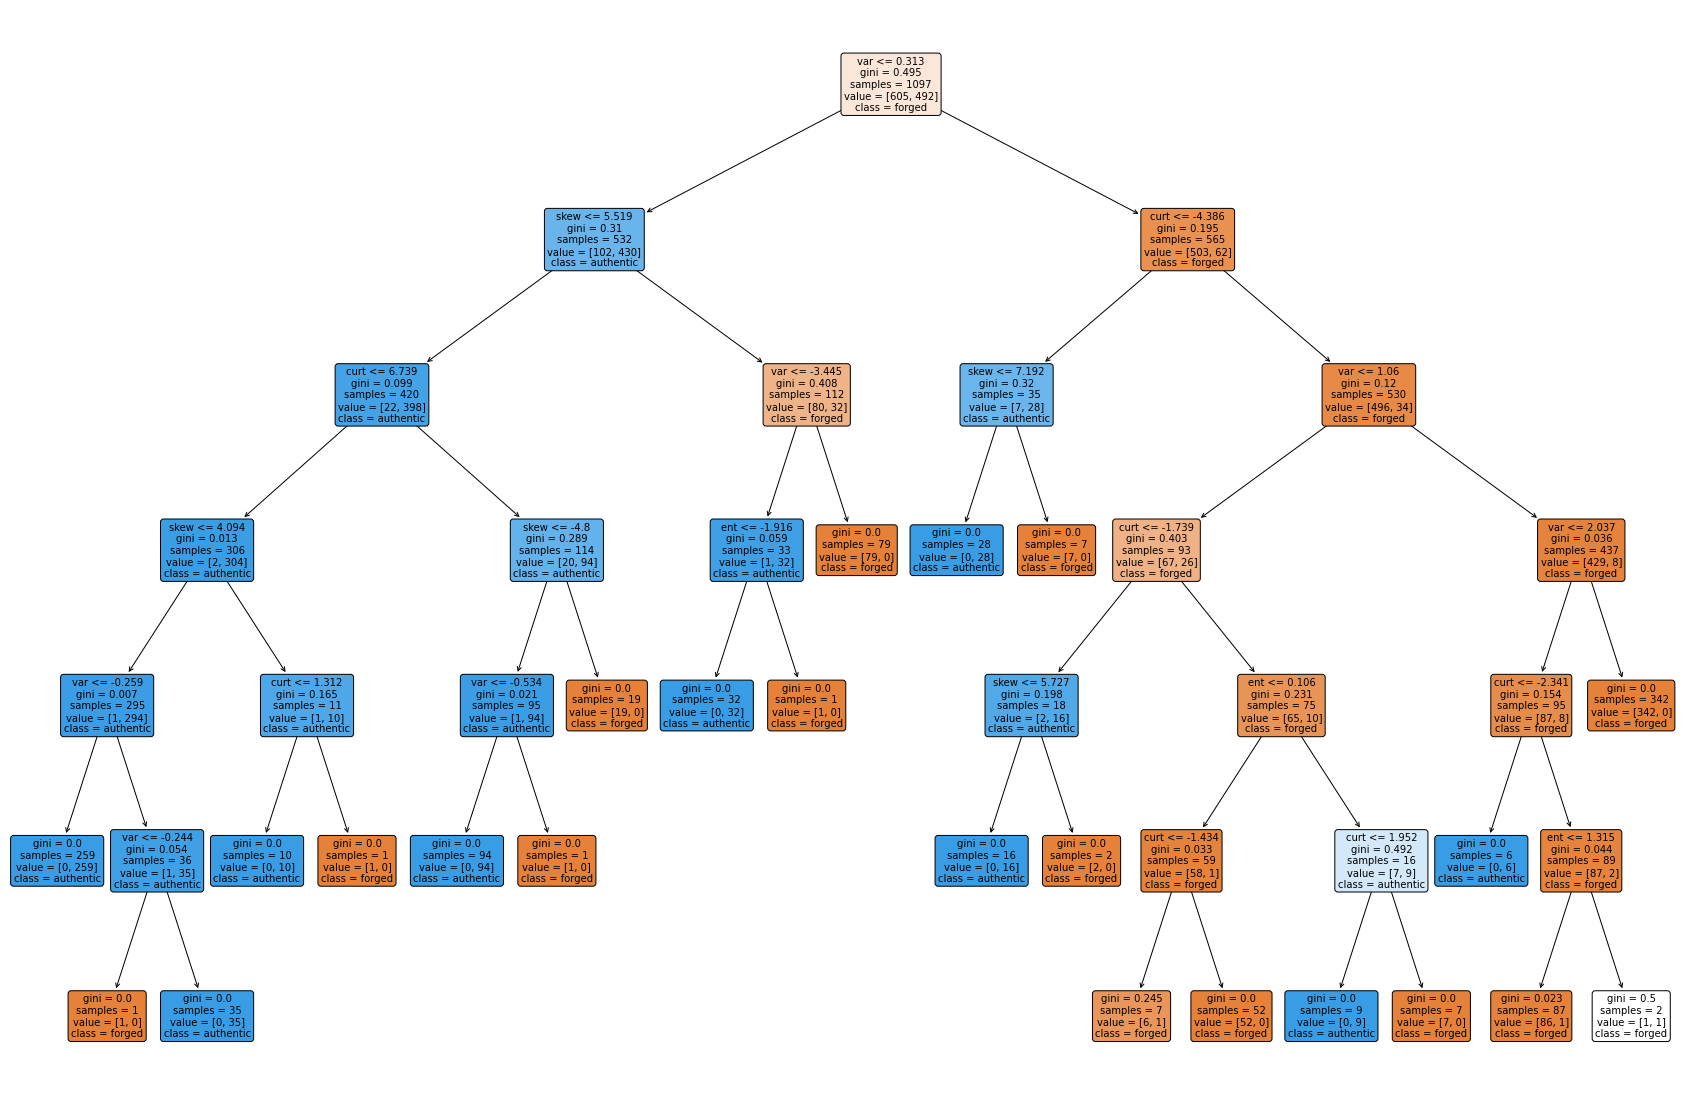

 
analysis based on min sample split:
 
training accuracy on minsamplesplit  2  = 94.80401093892435
test accuracy on minsamplesplit 2  = 93.81818181818183
training accuracy on minsamplesplit  3  = 94.80401093892435
test accuracy on minsamplesplit 3  = 93.81818181818183
training accuracy on minsamplesplit  4  = 94.80401093892435
test accuracy on minsamplesplit 4  = 93.81818181818183
training accuracy on minsamplesplit  5  = 94.80401093892435
test accuracy on minsamplesplit 5  = 93.81818181818183
training accuracy on minsamplesplit  6  = 94.80401093892435
test accuracy on minsamplesplit 6  = 93.81818181818183
training accuracy on minsamplesplit  7  = 94.80401093892435
test accuracy on minsamplesplit 7  = 93.81818181818183


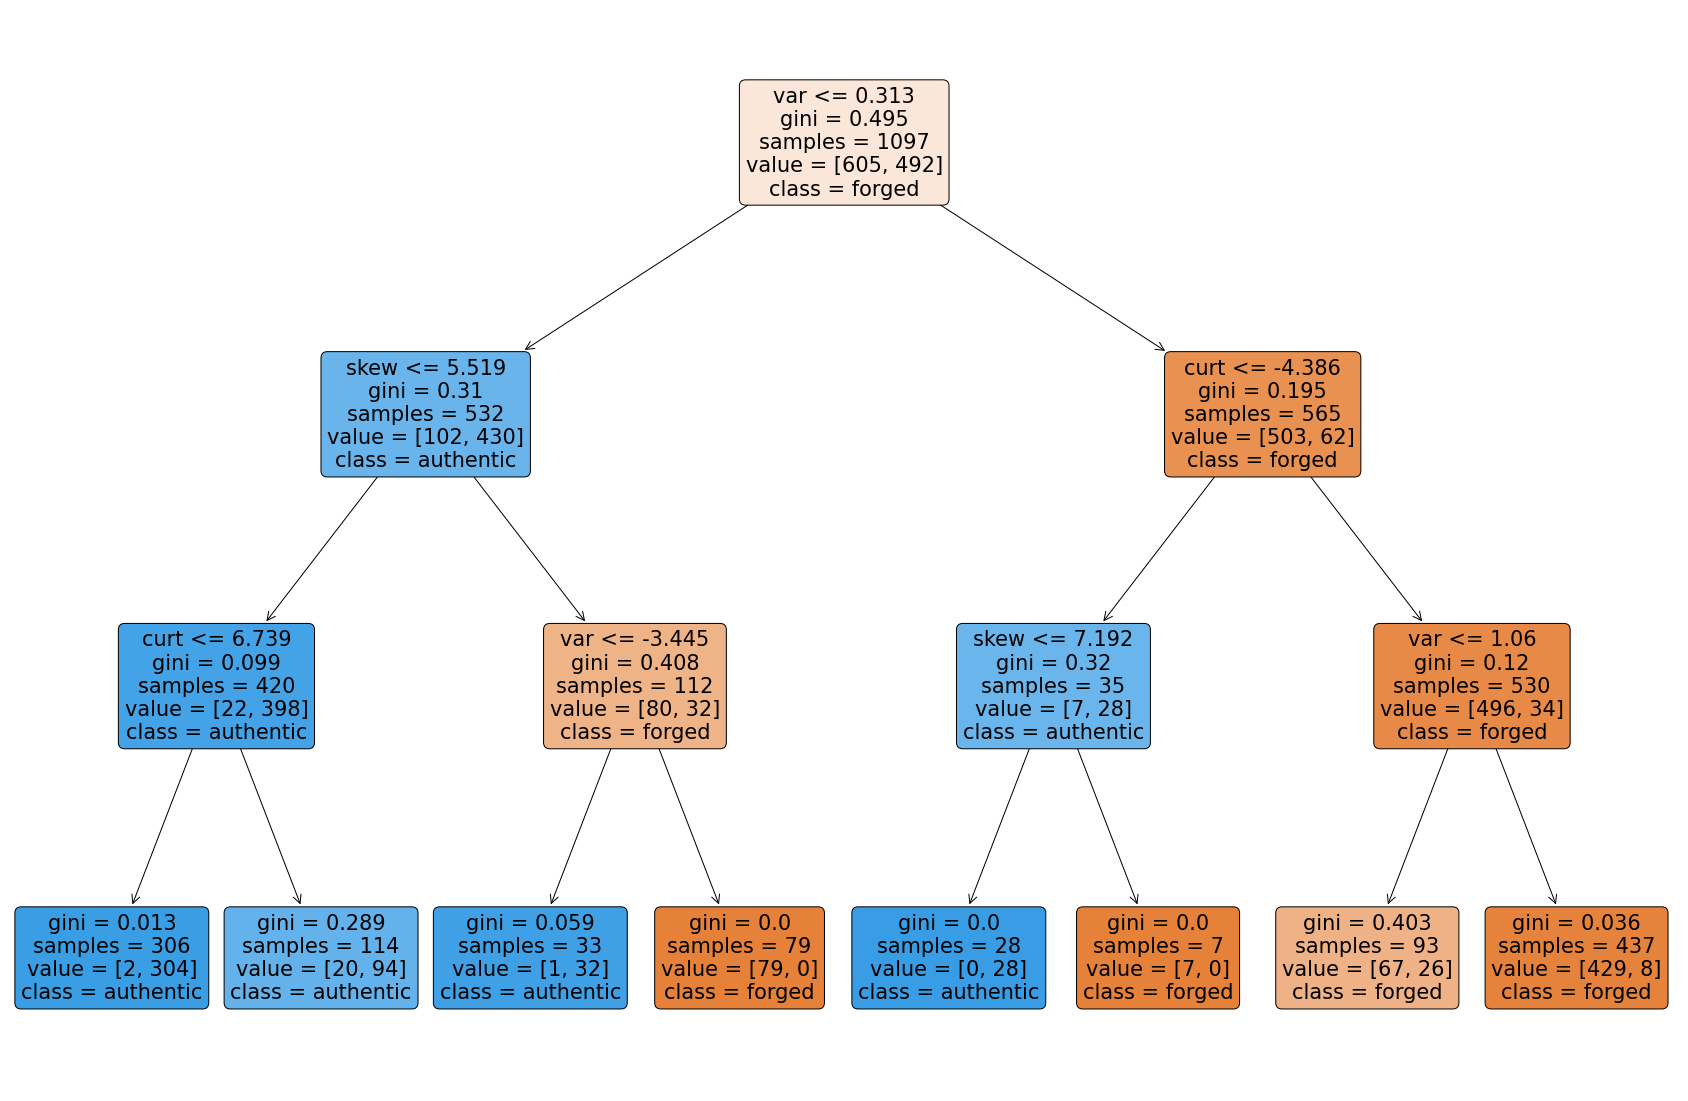

 
analysis based on criterion:
 
training accuracy on critenion  entropy  = 94.3482224247949
test accuracy on critenion  entropy  = 92.36363636363636
training accuracy on critenion  gini  = 94.80401093892435
test accuracy on critenion  gini  = 93.81818181818183


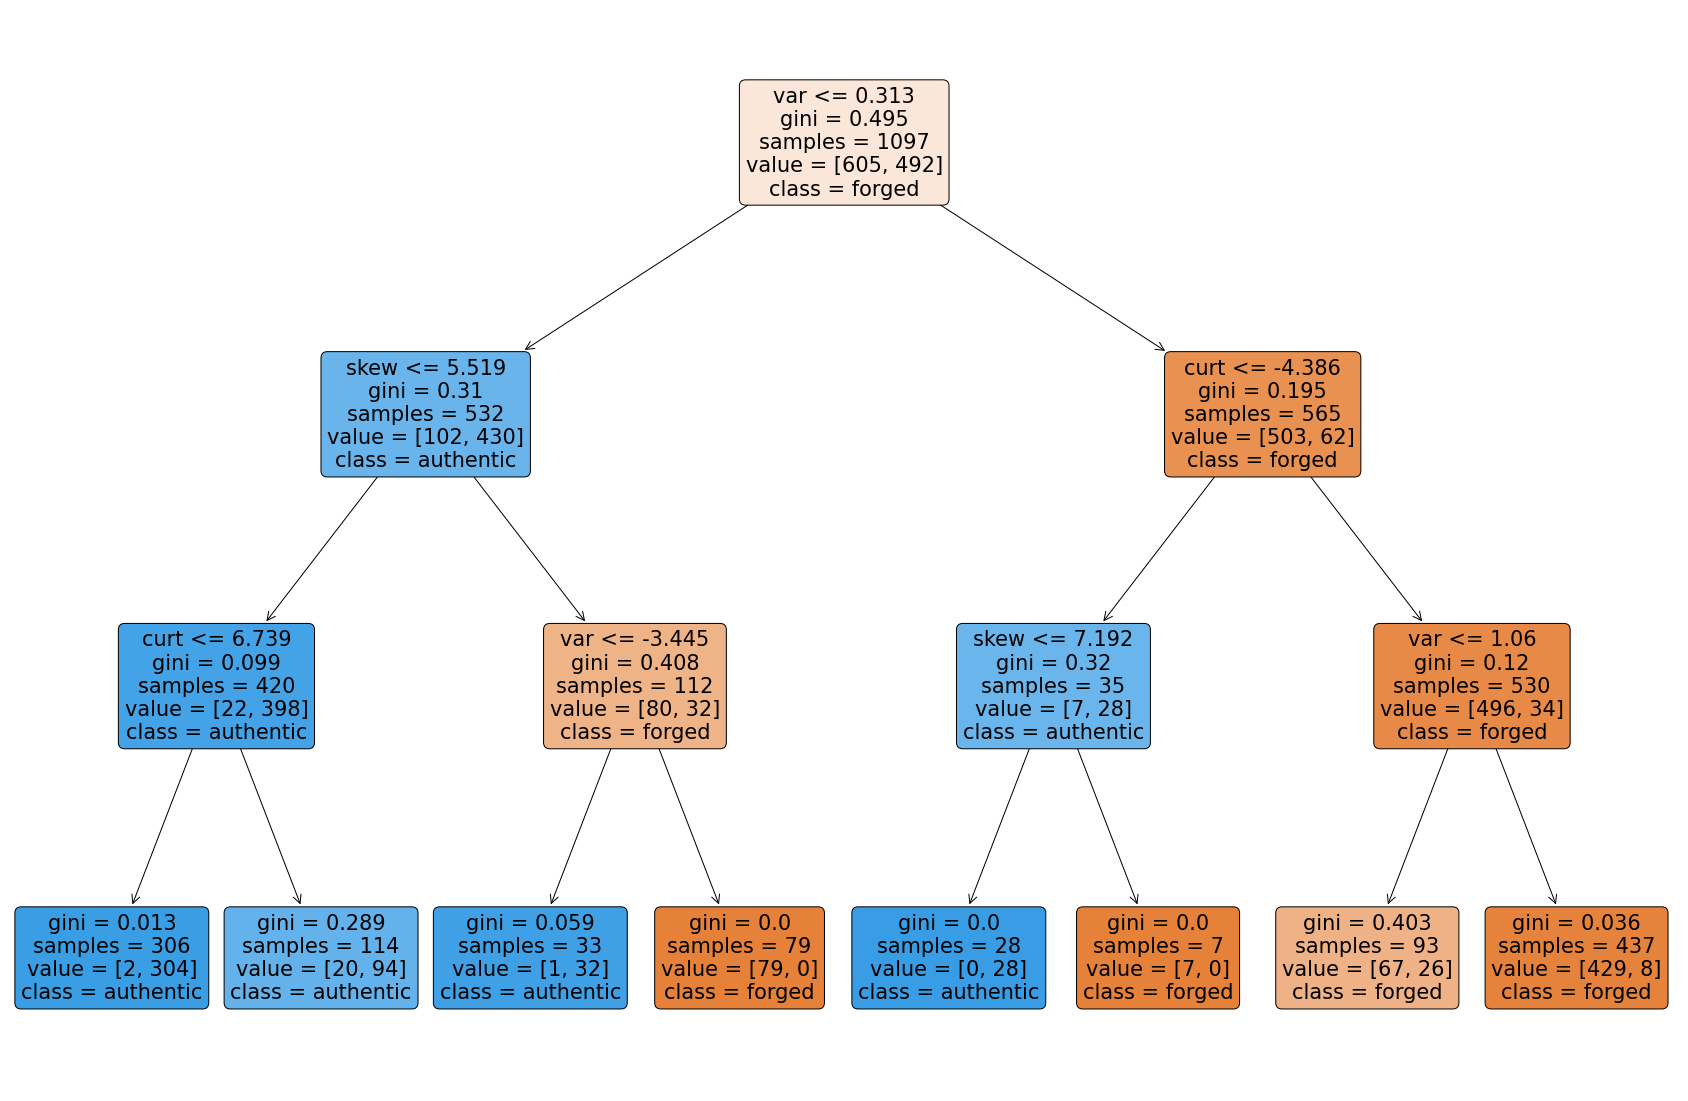

In [128]:
print("analysis based on depth:")
inbuildecisiontreeondepth(X_train,Y_train,X_test,Y_test)
print(" ")

print("analysis based on min sample split:")
print(" ")

inbuildecisiontreeonminsamlesplit(X_train,Y_train,X_test,Y_test)
print(" ")

print("analysis based on criterion:")
print(" ")

inbuildecisiontreeonmincritenion(X_train,Y_train,X_test,Y_test)